## Processing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

df_final = pd.read_pickle('NBA.pkl')

In [2]:
df_final.head()

,Player,Pos_x,Team_x,Age_x,Yrs,Dollars,Guaranteed,% GTD,Avg. Salary,Free Agent,...,TRB,AST,STL,BLK,TOV,PF,PTS,PER,Team_y,GS
9,James Harden,SG,HOU,30.0,4.0,171131520.0,171131520.0,100.0,42782880.0,2023.0,...,6.400000,7.400000,1.700000,0.900000,4.500000,3.400000,34.400000,28.4,HOU,61.0
0,Russell Westbrook,PG,HOUSigned w/OKC,31.0,5.0,206794070.0,206794070.0,100.0,41358814.0,2023.0,...,11.054795,10.739726,1.945205,0.452055,4.452055,3.356164,22.945205,21.1,NaN,NaN
16,Devin Booker,SG,PHX,23.0,5.0,158253000.0,158253000.0,100.0,31650600.0,2024.0,...,4.200000,6.600000,0.700000,0.300000,3.900000,3.000000,26.100000,19.8,PHO,62.0
183,Trae Young,PG,ATL,21.0,3.0,18201240.0,18201240.0,100.0,6067080.0,2022.0,...,3.716049,8.061728,0.888889,0.185185,3.802469,1.728395,19.123457,17.0,NaN,NaN
18,LeBron James,SF,LAL,35.0,4.0,153312846.0,153312846.0,100.0,38328212.0,2022.0,...,8.454545,8.254545,1.309091,0.600000,3.581818,1.709091,27.363636,25.6,NaN,NaN


In [3]:
df_final.columns

Index(['Player', 'Pos_x', 'Team_x', 'Age_x', 'Yrs', 'Dollars', 'Guaranteed',
       '% GTD', 'Avg. Salary', 'Free Agent', 'Year', 'Contract Ends', 'Pos_y',
       'Age_y', 'G', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'MP', 'ORB', 'DRB',
       'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS', 'PER', 'Team_y', 'GS'],
      dtype='object')

In [5]:
#Drop Unnecessary Categorical columns
df_final = df_final.drop(columns=['Player', 'Pos_x', 'Team_x', 'Pos_y', 'Age_y', 'Team_y'])

#Rename Age column
df_final.rename(columns={'Age_x':'Age'}, inplace=True)

df_final.columns

Index(['Age', 'Yrs', 'Dollars', 'Guaranteed', '% GTD', 'Avg. Salary',
       'Free Agent', 'Year', 'Contract Ends', 'G', 'FG%', '3P%', '2P%', 'eFG%',
       'FT%', 'MP', 'ORB', 'DRB', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT',
       'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'GS'],
      dtype='object')

In [6]:
#Check to make sure all columns are numeric
df_final.dtypes

Age              float64
Yrs              float64
Dollars          float64
Guaranteed       float64
% GTD            float64
Avg. Salary      float64
Free Agent       float64
Year               int64
Contract Ends    float64
G                float64
FG%              float64
3P%              float64
2P%              float64
eFG%             float64
FT%              float64
MP               float64
ORB              float64
DRB              float64
FG               float64
FGA              float64
3P               float64
3PA              float64
2P               float64
2PA              float64
FT               float64
FTA              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
PER              float64
GS               float64
dtype: object

In [7]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 9 to 412
Data columns (total 35 columns):
Age              405 non-null float64
Yrs              405 non-null float64
Dollars          405 non-null float64
Guaranteed       405 non-null float64
% GTD            405 non-null float64
Avg. Salary      405 non-null float64
Free Agent       405 non-null float64
Year             405 non-null int64
Contract Ends    405 non-null float64
G                391 non-null float64
FG%              391 non-null float64
3P%              391 non-null float64
2P%              391 non-null float64
eFG%             391 non-null float64
FT%              391 non-null float64
MP               391 non-null float64
ORB              391 non-null float64
DRB              391 non-null float64
FG               391 non-null float64
FGA              391 non-null float64
3P               391 non-null float64
3PA              391 non-null float64
2P               391 non-null float64
2PA              391 no

In [8]:
X = df_final.drop('Avg. Salary', axis=1).values
y = df_final['Avg. Salary'].values

## Imputing missing data in a ML Pipeline

In [10]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.impute import SimpleImputer

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='mean')),
         ('scaler', StandardScaler()),
         ('rf', RandomForestRegressor())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit to the training set
pipeline.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 874521.7518518517
Mean Squared Error: 2780940919468.97
Root Mean Squared Error: 1667615.339180163


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [13]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(y_pred - y_test)
    mape = 100 * np.mean(errors / y_test)
    #mean absolute percentage error (MAPE)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [14]:
base_accuracy = evaluate(pipeline, X_test, y_test)

Model Performance
Average Error: 874521.7519 degrees.
Accuracy = 89.97%.


### Cross-Validation

In [11]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(pipeline,X,y,cv=5,error_score='raise')

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.9242124  0.90857017 0.93523008 0.96390505 0.9580712 ]
Average 5-Fold CV Score: 0.9379977778203393


### GridSearchCV

In [29]:
# Create the parameter grid based on the results of random search 
"""
param_grid = {
    'rf__bootstrap': [True],
    'rf__max_depth': [80, 90, 100, 110],
    'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
    'rf__min_samples_split': [8, 10, 12],
    'rf__n_estimators': [100, 200, 300, 1000]
}
"""
param_grid = {
    'rf__n_estimators': [100, 200, 300, 1000],
    'rf__max_depth': [5, 8, 15, 25, 30],
    'rf__min_samples_split': [8, 10, 12],
    'rf__min_samples_leaf': [3, 4, 5] 
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 3)

In [30]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# best parameters
grid_search.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  8.3min finished


{'rf__max_depth': 25,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 8,
 'rf__n_estimators': 100}

In [31]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 874521.7519 degrees.
Accuracy = 89.97%.


In [18]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.00%.


In [32]:
def rmsle(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_log_error(y_test, y_pred))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {"Training MAE": metrics.mean_absolute_error(y_train, train_preds),
              "Valid MAE": metrics.mean_absolute_error(y_test, test_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_test, test_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_test, y_test)}
    return scores

In [33]:
show_scores(grid_search)

{'Training MAE': 500932.916125389,
 'Valid MAE': 920783.5738459233,
 'Training RMSLE': 0.08516849620956647,
 'Valid RMSLE': 0.15100132630625307,
 'Training R^2': 0.9883975080041035,
 'Valid R^2': 0.9757780531413875}

In [34]:
show_scores(pipeline)

{'Training MAE': 422444.0067901234,
 'Valid MAE': 874521.7518518517,
 'Training RMSLE': 0.07009020877395382,
 'Valid RMSLE': 0.14025840106783538,
 'Training R^2': 0.9921353587614756,
 'Valid R^2': 0.9770341828850343}

## Model Predictions

In [35]:
y_pred = grid_search.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1662060.0,1.793089e+06
1,12000835.0,1.240256e+07
2,31957493.0,2.803571e+07
3,17000450.0,1.733399e+07
4,8000000.0,8.714086e+06
...,...,...
76,33333333.0,2.681251e+07
77,14545000.0,1.291788e+07
78,1532398.0,1.518729e+06
79,1270792.0,1.500010e+06


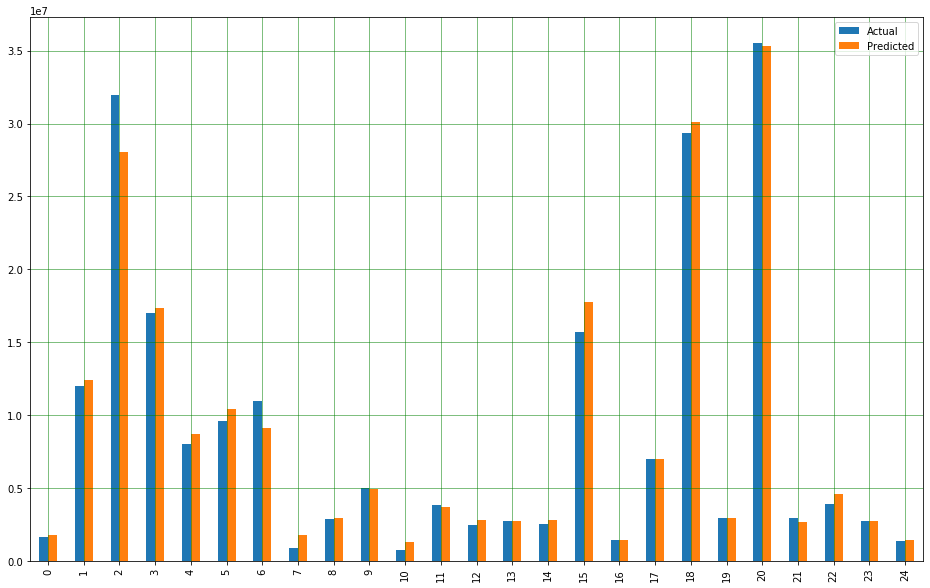

In [36]:
df = df.head(25)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Feature Importance

In [41]:
# Showing feature importance
model = pipeline.steps[2][1]
model.feature_importances_

array([6.43274359e-03, 6.52928470e-03, 3.13130337e-01, 6.34316796e-01,
       1.91000150e-04, 1.98325705e-03, 5.04020434e-03, 2.21767031e-04,
       1.76207874e-03, 3.30442296e-04, 6.30098735e-04, 1.51134618e-03,
       1.01583882e-04, 2.51047098e-03, 5.98132508e-04, 2.42811716e-04,
       1.91819290e-03, 1.51972751e-03, 7.95635971e-05, 3.19887146e-03,
       3.22503780e-03, 5.73984029e-04, 6.92563919e-04, 1.18893540e-03,
       3.31650643e-03, 2.94167683e-03, 1.38620878e-03, 2.43207892e-04,
       1.09001243e-03, 9.81054004e-04, 9.96459051e-04, 1.83497987e-04,
       3.96869321e-04, 5.35276125e-04])

In [50]:
# Ranking feature importance
df_feature_importance = pd.DataFrame(model.feature_importances_, columns=['feature importance']).sort_values('feature importance', ascending=False)
df_feature_importance

,feature importance
3,0.634317
2,0.313130
1,0.006529
0,0.006433
6,0.005040
24,0.003317
20,0.003225
19,0.003199
25,0.002942
13,0.002510


Feature: 0, Score: 0.00643
Feature: 1, Score: 0.00653
Feature: 2, Score: 0.31313
Feature: 3, Score: 0.63432
Feature: 4, Score: 0.00019
Feature: 5, Score: 0.00198
Feature: 6, Score: 0.00504
Feature: 7, Score: 0.00022
Feature: 8, Score: 0.00176
Feature: 9, Score: 0.00033
Feature: 10, Score: 0.00063
Feature: 11, Score: 0.00151
Feature: 12, Score: 0.00010
Feature: 13, Score: 0.00251
Feature: 14, Score: 0.00060
Feature: 15, Score: 0.00024
Feature: 16, Score: 0.00192
Feature: 17, Score: 0.00152
Feature: 18, Score: 0.00008
Feature: 19, Score: 0.00320
Feature: 20, Score: 0.00323
Feature: 21, Score: 0.00057
Feature: 22, Score: 0.00069
Feature: 23, Score: 0.00119
Feature: 24, Score: 0.00332
Feature: 25, Score: 0.00294
Feature: 26, Score: 0.00139
Feature: 27, Score: 0.00024
Feature: 28, Score: 0.00109
Feature: 29, Score: 0.00098
Feature: 30, Score: 0.00100
Feature: 31, Score: 0.00018
Feature: 32, Score: 0.00040
Feature: 33, Score: 0.00054


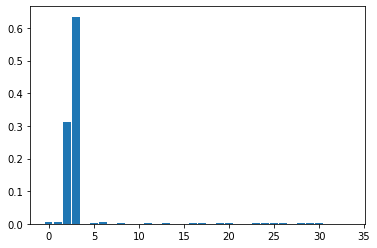

In [46]:
import matplotlib.pyplot as plt

# Display feature importance and display plot 
# Get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [47]:
# Match feature with feature name
for name, importance in zip(df_final.columns, model.feature_importances_):
    print(name, "=", importance)

Age = 0.006432743590503068
Yrs = 0.006529284701047239
Dollars = 0.3131303367776469
Guaranteed = 0.634316795867433
% GTD = 0.0001910001495518886
Avg. Salary = 0.0019832570468695616
Free Agent = 0.005040204335822387
Year = 0.00022176703057194728
Contract Ends = 0.0017620787367612287
G = 0.0003304422964433954
FG% = 0.0006300987347806466
3P% = 0.001511346179428632
2P% = 0.00010158388163915065
eFG% = 0.002510470980695977
FT% = 0.000598132508395844
MP = 0.00024281171643557967
ORB = 0.0019181928978405343
DRB = 0.0015197275070863265
FG = 7.956359711601378e-05
FGA = 0.003198871464812783
3P = 0.003225037804748481
3PA = 0.0005739840286142857
2P = 0.0006925639190807274
2PA = 0.001188935395116242
FT = 0.0033165064261211504
FTA = 0.0029416768306414
TRB = 0.0013862087818882624
AST = 0.00024320789231374986
STL = 0.001090012432593967
BLK = 0.0009810540043855215
TOV = 0.0009964590514174392
PF = 0.0001834979865920906
PTS = 0.0003968693205605047
PER = 0.0005352761250441501
